In [28]:
# 5월 11일 목요일

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [18]:
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=None,min_samples_split=2,min_samples_leaf=1)
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=156)

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                impurity=True,filled=True)

In [20]:
import graphviz

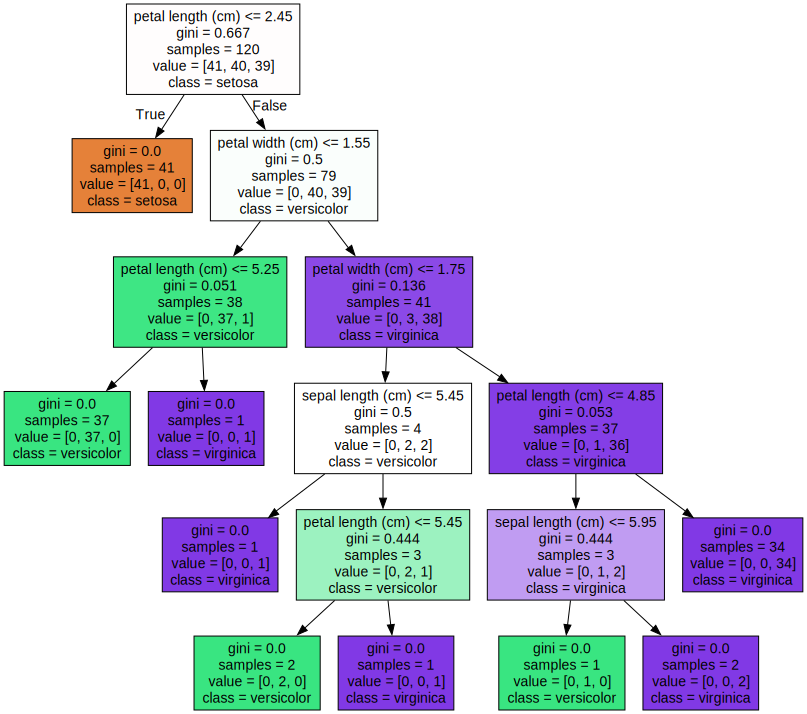

In [21]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

정보는 1에 가까운게 좋다.
지니계수는 0에 가까울 수록 좋다 이유는 (불평등지수로 만들었기 때문에 1에 가까울수록 불평등하다는 이야기)
petal length<=5.25(T) petal length<=1.75(F)

In [22]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
import seaborn as sns
import numpy as np

In [25]:
for name, value in zip(iris.feature_names,dt_clf.feature_importances_):
    print(name,value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


<Axes: >

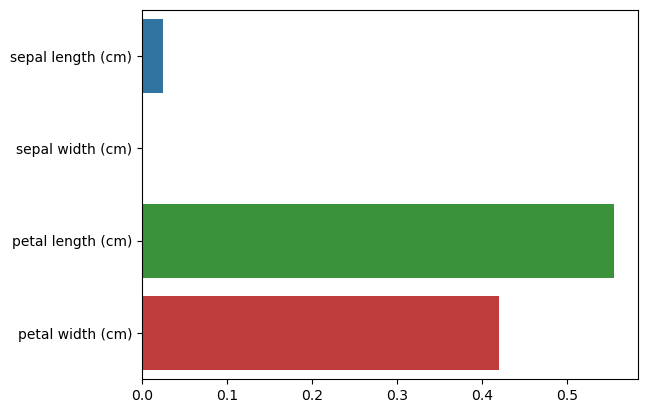

In [26]:
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

In [27]:
# 결정트리 과적합(Overfitting)

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [34]:
x,y = make_classification(n_features=2,
                          n_classes=3,
                          n_clusters_per_class=1, # 집단(clusters)의 클래스1개를 의미
                          random_state=0,
                          n_redundant=0)

In [35]:
x,y

(array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023],
        [ 0.50102164, -1.27508231],
        [ 1.10447379,  0.35117341],
        [-2.5077599 ,  2.48857017],
        [-0.00811816,  0.11564734],
        [ 0.31338067, -0.87926516],
        [-0.04687748,  1.35489986],
        [ 1.20888898,  0.64232637],
        [ 1.71173001, -1.04637674],
        [ 1.29670808, -0.6054158 ],
        [ 1.24188996, -0.3819388 ],
        [-1.78273822,  1.52817583],
        [-1.50514147,  1.27186707],
        [ 0.87163989, -0.42276158],
        [ 2.53026908, -1.61974843],
        [ 0.95000368,  1.83240861],
        [-1.53716448, -0.89497353],
        [-2.13650855,  2.73389996],
        [ 1.01037788,  0.59402713],
        [ 1.9876467 , -0.22375521],
        [ 1.12463497,  2.13646176],
        [-0.65122279,  0.97865617],
        [ 0.85144036,  0.42548085],
        [-0.10789457, -0.659

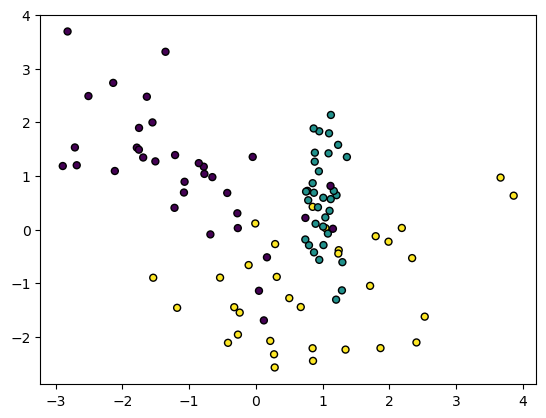

In [36]:
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolors='k')

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Classifier의 Decision Boundary를 시각화 하는 함수 
def visualize_boundary(model, X, y): 
    fig,ax = plt.subplots() 
    
    # 학습 데이타 scatter plot으로 나타내기 
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight') 
    ax.axis('off') 
    xlim_start , xlim_end = ax.get_xlim() 
    ylim_start , ylim_end = ax.get_ylim() 
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y)) 
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                                                         levels=np.arange(n_classes + 1) - 0.5, 
                                                         cmap='rainbow', clim=(y.min(), y.max()), 
                                                         zorder=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_19324\4004883774.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


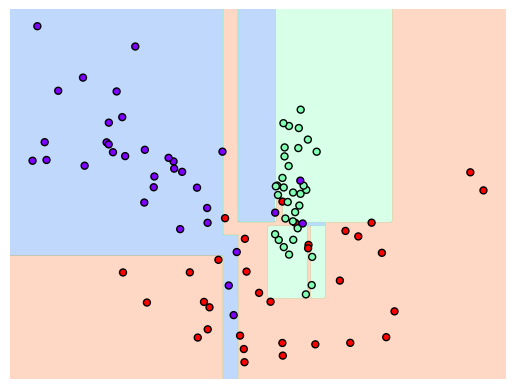

In [45]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(x,y)
visualize_boundary(dt_clf,x,y)

C:\Users\admin\AppData\Local\Temp\ipykernel_19324\4004883774.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


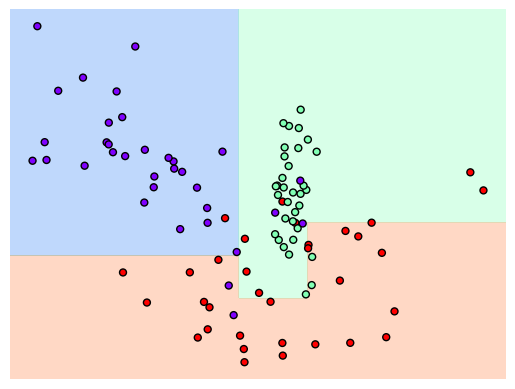

In [46]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(x,y)
visualize_boundary(dt_clf,x,y)